In [1]:
import numpy as np
import bilby 
import pycbc 
import sys
import matplotlib.pyplot as plt
import pandas as pd
import zuko
from glasflow import RealNVP, CouplingNSF

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

import pickle
from sklearn.decomposition import IncrementalPCA
import sklearn.decomposition 
import os
import json


/home/qian.hu/.conda/envs/myigwn-py39/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
import river.data
from river.data.datagenerator import DataGeneratorBilbyFD
from river.data.dataset import DatasetStrainFD
#import river.data.utils as datautils
from river.data.utils import *

from river.models import embedding
from river.models.utils import *
from river.models.embedding.conv import EmbeddingConv1D,EmbeddingConv2D


# Make test data

In [3]:
config_path = "trained_models/glasnsf_conv1dconv2d_a1d200"
with open(f"{config_path}/config.json", 'r') as f:
    config = json.load(f)

config_datagenerator = config['data_generator_parameters']
config_training = config['training_parameters']
config_flow = config['model_parameters']['flow']
config_embd_proj = config['model_parameters']['embedding_proj']
config_embd_noproj = config['model_parameters']['embedding_noproj']

In [7]:
detector_names = config_datagenerator['detector_names']

Ntest = 200
injection_parameters_test = generate_BNS_injection_parameters(Nsample = 2*Ntest, **config_datagenerator)
data_generator_test = DataGeneratorBilbyFD(**config_datagenerator)


08:08 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using bilby_default PSDs to generate data.


In [8]:
data_generator_test.inject_signals(injection_parameters_test, 2*Ntest, Ntest)
data_generator_test.numpy_starins()

08:08 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 106.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 106.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 106.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 89.8s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 89.8s, but the data for detector L1 has a durat

Injecting 0-th signal, 0.0% done
Injecting 1-th signal, 0.25% done
SNR=5.660125664148857<8, this injection is not recorded.
Injecting 2-th signal, 0.5% done
SNR=7.358355111013628<8, this injection is not recorded.
Injecting 3-th signal, 0.75% done
Injecting 4-th signal, 1.0% done


08:08 bilby WARNING : The injected signal has a duration in-band of 102.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 102.2s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 102.2s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 98.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 98.9s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 98.9s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 103.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 103.0s, but the data for detector L1 has a dur

Injecting 5-th signal, 1.25% done
Injecting 6-th signal, 1.5% done
Injecting 7-th signal, 1.75% done
SNR=6.1699714401518015<8, this injection is not recorded.
Injecting 8-th signal, 2.0% done
SNR=7.660003650600541<8, this injection is not recorded.
Injecting 9-th signal, 2.25% done


08:08 bilby WARNING : The injected signal has a duration in-band of 69.4s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 69.4s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 69.4s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 155.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 155.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 155.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 154.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 154.5s, but the data for detector L1 has a dur

Injecting 10-th signal, 2.5% done
Injecting 11-th signal, 2.75% done
Injecting 12-th signal, 3.0% done
SNR=3.743658855819494<8, this injection is not recorded.
Injecting 13-th signal, 3.25% done
Injecting 14-th signal, 3.5% done


08:08 bilby WARNING : The injected signal has a duration in-band of 104.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 104.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 104.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 91.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 91.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 91.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 111.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 111.9s, but the data for detector L1 has a dur

Injecting 15-th signal, 3.75% done
Injecting 16-th signal, 4.0% done
Injecting 17-th signal, 4.25% done
SNR=5.393323229728343<8, this injection is not recorded.
Injecting 18-th signal, 4.5% done
Injecting 19-th signal, 4.75% done


08:08 bilby WARNING : The injected signal has a duration in-band of 125.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 125.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 125.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 55.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 55.2s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 55.2s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 110.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 110.5s, but the data for detector L1 has a dur

Injecting 20-th signal, 5.0% done
Injecting 21-th signal, 5.25% done
Injecting 22-th signal, 5.5% done
Injecting 23-th signal, 5.75% done
Injecting 24-th signal, 6.0% done


08:08 bilby WARNING : The injected signal has a duration in-band of 146.3s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 146.3s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 146.3s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 160.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 160.5s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 160.5s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 156.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 156.9s, but the data for detector L1 has a 

Injecting 25-th signal, 6.25% done
Injecting 26-th signal, 6.5% done
Injecting 27-th signal, 6.75% done
Injecting 28-th signal, 7.0% done
Injecting 29-th signal, 7.25% done


08:08 bilby WARNING : The injected signal has a duration in-band of 96.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 96.0s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 96.0s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 145.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 145.2s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 145.2s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 72.1s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 72.1s, but the data for detector L1 has a durat

Injecting 30-th signal, 7.5% done
Injecting 31-th signal, 7.75% done
Injecting 32-th signal, 8.0% done
Injecting 33-th signal, 8.25% done
Injecting 34-th signal, 8.5% done


08:08 bilby WARNING : The injected signal has a duration in-band of 94.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 94.2s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 94.2s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 130.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 130.5s, but the data for detector L1 has a dur

Injecting 35-th signal, 8.75% done
Injecting 36-th signal, 9.0% done
SNR=7.084071182073628<8, this injection is not recorded.
Injecting 37-th signal, 9.25% done
Injecting 38-th signal, 9.5% done
Injecting 39-th signal, 9.75% done


08:08 bilby WARNING : The injected signal has a duration in-band of 89.4s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 89.4s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 89.4s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 133.8s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 133.8s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 133.8s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 99.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 99.0s, but the data for detector L1 has a durat

Injecting 40-th signal, 10.0% done
Injecting 41-th signal, 10.25% done
Injecting 42-th signal, 10.5% done
Injecting 43-th signal, 10.75% done
SNR=5.783625361243914<8, this injection is not recorded.
Injecting 44-th signal, 11.0% done


08:08 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 107.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 107.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 107.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 61.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 61.2s, but the data for detector L1 has a durat

SNR=5.995417198656122<8, this injection is not recorded.
Injecting 45-th signal, 11.25% done
Injecting 46-th signal, 11.5% done
Injecting 47-th signal, 11.75% done
Injecting 48-th signal, 12.0% done
Injecting 49-th signal, 12.25% done


08:08 bilby WARNING : The injected signal has a duration in-band of 137.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 137.9s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 137.9s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 152.4s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 152.4s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 152.4s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 102.4s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 102.4s, but the data for detector L1 has a 

Injecting 50-th signal, 12.5% done
Injecting 51-th signal, 12.75% done
Injecting 52-th signal, 13.0% done
Injecting 53-th signal, 13.25% done
Injecting 54-th signal, 13.5% done


08:08 bilby WARNING : The injected signal has a duration in-band of 73.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 73.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 73.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 100.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 100.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 100.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 135.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 135.9s, but the data for detector L1 has a dur

Injecting 55-th signal, 13.75% done
Injecting 56-th signal, 14.0% done
Injecting 57-th signal, 14.25% done
Injecting 58-th signal, 14.5% done
Injecting 59-th signal, 14.75% done


08:08 bilby WARNING : The injected signal has a duration in-band of 77.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 77.0s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 77.0s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 66.1s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 66.1s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 66.1s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 53.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 53.2s, but the data for detector L1 has a duration

Injecting 60-th signal, 15.0% done
Injecting 61-th signal, 15.25% done
Injecting 62-th signal, 15.5% done
Injecting 63-th signal, 15.75% done
SNR=5.187294882919956<8, this injection is not recorded.
Injecting 64-th signal, 16.0% done


08:08 bilby WARNING : The injected signal has a duration in-band of 88.8s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 88.8s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 88.8s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 68.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 68.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 68.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 160.3s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 160.3s, but the data for detector L1 has a durati

Injecting 65-th signal, 16.25% done
Injecting 66-th signal, 16.5% done
Injecting 67-th signal, 16.75% done
Injecting 68-th signal, 17.0% done
Injecting 69-th signal, 17.25% done


08:08 bilby WARNING : The injected signal has a duration in-band of 98.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 98.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 98.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 119.8s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 119.8s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 119.8s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 83.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 83.5s, but the data for detector L1 has a durat

Injecting 70-th signal, 17.5% done
Injecting 71-th signal, 17.75% done
Injecting 72-th signal, 18.0% done
Injecting 73-th signal, 18.25% done
Injecting 74-th signal, 18.5% done


08:08 bilby WARNING : The injected signal has a duration in-band of 140.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 140.0s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 140.0s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 117.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 117.0s, but the data for detector L1 has a dur

Injecting 75-th signal, 18.75% done
Injecting 76-th signal, 19.0% done
SNR=7.478551034748977<8, this injection is not recorded.
Injecting 77-th signal, 19.25% done
Injecting 78-th signal, 19.5% done
Injecting 79-th signal, 19.75% done


08:08 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 124.1s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 124.1s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 124.1s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 155.2s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 155.2s, but the data for detector L1 has a dur

Injecting 80-th signal, 20.0% done
Injecting 81-th signal, 20.25% done
Injecting 82-th signal, 20.5% done
Injecting 83-th signal, 20.75% done
Injecting 84-th signal, 21.0% done


08:08 bilby WARNING : The injected signal has a duration in-band of 109.0s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 109.0s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 109.0s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 162.5s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 162.5s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 162.5s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 179.9s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 179.9s, but the data for detector L1 has a 

Injecting 85-th signal, 21.25% done
Injecting 86-th signal, 21.5% done
Injecting 87-th signal, 21.75% done
Injecting 88-th signal, 22.0% done
Injecting 89-th signal, 22.25% done


08:08 bilby WARNING : The injected signal has a duration in-band of 95.6s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 95.6s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 95.6s, but the data for detector V1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 182.7s, but the data for detector H1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 182.7s, but the data for detector L1 has a duration of 32s
08:08 bilby WARNING : The injected signal has a duration in-band of 182.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 54.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 54.7s, but the data for detector L1 has a durat

SNR=5.63382132598177<8, this injection is not recorded.
Injecting 90-th signal, 22.5% done
Injecting 91-th signal, 22.75% done
Injecting 92-th signal, 23.0% done
Injecting 93-th signal, 23.25% done
Injecting 94-th signal, 23.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 59.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 59.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 59.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 139.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 139.4s, but the data for detector L1 has a dur

Injecting 95-th signal, 23.75% done
Injecting 96-th signal, 24.0% done
Injecting 97-th signal, 24.25% done
Injecting 98-th signal, 24.5% done
Injecting 99-th signal, 24.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 63.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 63.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 63.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.5s, but the data for detector L1 has a durati

Injecting 100-th signal, 25.0% done
Injecting 101-th signal, 25.25% done
Injecting 102-th signal, 25.5% done
SNR=5.358316870397329<8, this injection is not recorded.
Injecting 103-th signal, 25.75% done
Injecting 104-th signal, 26.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 79.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 220.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 220.9s, but the data for detector L1 has a dur

Injecting 105-th signal, 26.25% done
Injecting 106-th signal, 26.5% done
Injecting 107-th signal, 26.75% done
Injecting 108-th signal, 27.0% done
Injecting 109-th signal, 27.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 134.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 109.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 109.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 109.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.4s, but the data for detector L1 has a du

Injecting 110-th signal, 27.5% done
Injecting 111-th signal, 27.75% done
Injecting 112-th signal, 28.0% done
Injecting 113-th signal, 28.25% done
Injecting 114-th signal, 28.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 85.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 168.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 168.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 168.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 53.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 53.0s, but the data for detector L1 has a durat

Injecting 115-th signal, 28.75% done
Injecting 116-th signal, 29.0% done
Injecting 117-th signal, 29.25% done
Injecting 118-th signal, 29.5% done
Injecting 119-th signal, 29.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 79.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 75.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 75.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 75.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.2s, but the data for detector L1 has a duration

Injecting 120-th signal, 30.0% done
Injecting 121-th signal, 30.25% done
Injecting 122-th signal, 30.5% done
Injecting 123-th signal, 30.75% done
Injecting 124-th signal, 31.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 143.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 143.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 143.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 62.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 62.1s, but the data for detector L1 has a durat

Injecting 125-th signal, 31.25% done
Injecting 126-th signal, 31.5% done
Injecting 127-th signal, 31.75% done
Injecting 128-th signal, 32.0% done
Injecting 129-th signal, 32.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 60.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 60.8s, but the data for detector L1 has a durat

Injecting 130-th signal, 32.5% done
Injecting 131-th signal, 32.75% done
Injecting 132-th signal, 33.0% done
Injecting 133-th signal, 33.25% done
Injecting 134-th signal, 33.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 136.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 136.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 136.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 99.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 99.8s, but the data for detector L1 has a du

Injecting 135-th signal, 33.75% done
Injecting 136-th signal, 34.0% done
Injecting 137-th signal, 34.25% done
Injecting 138-th signal, 34.5% done
Injecting 139-th signal, 34.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 84.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 112.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 112.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 112.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 61.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 61.2s, but the data for detector L1 has a durat

SNR=4.841807890445124<8, this injection is not recorded.
Injecting 140-th signal, 35.0% done
Injecting 141-th signal, 35.25% done
Injecting 142-th signal, 35.5% done
Injecting 143-th signal, 35.75% done
Injecting 144-th signal, 36.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.3s, but the data for detector L1 has a dur

Injecting 145-th signal, 36.25% done
Injecting 146-th signal, 36.5% done
Injecting 147-th signal, 36.75% done
Injecting 148-th signal, 37.0% done
Injecting 149-th signal, 37.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 70.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 70.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 70.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 137.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 137.8s, but the data for detector L1 has a durati

Injecting 150-th signal, 37.5% done
Injecting 151-th signal, 37.75% done
Injecting 152-th signal, 38.0% done
SNR=7.121725539634017<8, this injection is not recorded.
Injecting 153-th signal, 38.25% done
Injecting 154-th signal, 38.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 118.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 187.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 187.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 187.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.2s, but the data for detector L1 has a du

Injecting 155-th signal, 38.75% done
Injecting 156-th signal, 39.0% done
Injecting 157-th signal, 39.25% done
Injecting 158-th signal, 39.5% done
Injecting 159-th signal, 39.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 104.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 104.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 104.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 182.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 182.6s, but the data for detector L1 has a dur

Injecting 160-th signal, 40.0% done
Injecting 161-th signal, 40.25% done
Injecting 162-th signal, 40.5% done
Injecting 163-th signal, 40.75% done
Injecting 164-th signal, 41.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 144.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 144.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 144.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 204.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 204.4s, but the data for detector L1 has a 

Injecting 165-th signal, 41.25% done
Injecting 166-th signal, 41.5% done
Injecting 167-th signal, 41.75% done
Injecting 168-th signal, 42.0% done
Injecting 169-th signal, 42.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 68.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 68.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 68.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 58.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 58.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 58.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 192.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 192.6s, but the data for detector L1 has a durati

Injecting 170-th signal, 42.5% done
Injecting 171-th signal, 42.75% done
Injecting 172-th signal, 43.0% done
Injecting 173-th signal, 43.25% done
SNR=7.586387923004658<8, this injection is not recorded.
Injecting 174-th signal, 43.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 71.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 71.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 71.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 55.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 55.7s, but the data for detector L1 has a duration

Injecting 175-th signal, 43.75% done
Injecting 176-th signal, 44.0% done
Injecting 177-th signal, 44.25% done
Injecting 178-th signal, 44.5% done
SNR=4.804756046150391<8, this injection is not recorded.
Injecting 179-th signal, 44.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 129.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 129.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 129.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 153.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 153.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 153.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 97.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 97.5s, but the data for detector L1 has a du

SNR=7.426995533134333<8, this injection is not recorded.
Injecting 180-th signal, 45.0% done
Injecting 181-th signal, 45.25% done
Injecting 182-th signal, 45.5% done
Injecting 183-th signal, 45.75% done
Injecting 184-th signal, 46.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 146.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 146.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 146.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 76.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 76.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 76.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.6s, but the data for detector L1 has a dur

Injecting 185-th signal, 46.25% done
Injecting 186-th signal, 46.5% done
Injecting 187-th signal, 46.75% done
Injecting 188-th signal, 47.0% done
Injecting 189-th signal, 47.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 62.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 62.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 62.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.5s, but the data for detector L1 has a duration

Injecting 190-th signal, 47.5% done
SNR=7.493324637684899<8, this injection is not recorded.
Injecting 191-th signal, 47.75% done
Injecting 192-th signal, 48.0% done
Injecting 193-th signal, 48.25% done
Injecting 194-th signal, 48.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 101.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 141.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 141.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 141.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 90.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 90.5s, but the data for detector L1 has a du

Injecting 195-th signal, 48.75% done
Injecting 196-th signal, 49.0% done
Injecting 197-th signal, 49.25% done
Injecting 198-th signal, 49.5% done
Injecting 199-th signal, 49.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 61.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 61.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 61.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.6s, but the data for detector L1 has a durati

Injecting 200-th signal, 50.0% done
Injecting 201-th signal, 50.25% done
Injecting 202-th signal, 50.5% done
Injecting 203-th signal, 50.75% done
Injecting 204-th signal, 51.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 236.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 236.8s, but the data for detector L1 has a 

Injecting 205-th signal, 51.25% done
Injecting 206-th signal, 51.5% done
Injecting 207-th signal, 51.75% done
Injecting 208-th signal, 52.0% done
Injecting 209-th signal, 52.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 167.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 167.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 167.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.7s, but the data for detector L1 has a dur

Injecting 210-th signal, 52.5% done
Injecting 211-th signal, 52.75% done
Injecting 212-th signal, 53.0% done
Injecting 213-th signal, 53.25% done
Injecting 214-th signal, 53.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 123.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 77.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 77.1s, but the data for detector L1 has a durat

Injecting 215-th signal, 53.75% done
Injecting 216-th signal, 54.0% done
Injecting 217-th signal, 54.25% done
Injecting 218-th signal, 54.5% done
Injecting 219-th signal, 54.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 134.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 95.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 95.5s, but the data for detector L1 has a du

Injecting 220-th signal, 55.0% done
SNR=7.917043488419015<8, this injection is not recorded.
Injecting 221-th signal, 55.25% done
Injecting 222-th signal, 55.5% done
Injecting 223-th signal, 55.75% done
Injecting 224-th signal, 56.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 96.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 122.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 122.4s, but the data for detector L1 has a durati

Injecting 225-th signal, 56.25% done
SNR=4.120739234975979<8, this injection is not recorded.
Injecting 226-th signal, 56.5% done
Injecting 227-th signal, 56.75% done
SNR=5.843406053266944<8, this injection is not recorded.
Injecting 228-th signal, 57.0% done
Injecting 229-th signal, 57.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 132.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 132.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 67.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 67.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 67.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector L1 has a durat

SNR=7.159829719519751<8, this injection is not recorded.
Injecting 230-th signal, 57.5% done
Injecting 231-th signal, 57.75% done
Injecting 232-th signal, 58.0% done
Injecting 233-th signal, 58.25% done
Injecting 234-th signal, 58.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 93.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 97.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 97.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 97.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 52.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 52.6s, but the data for detector L1 has a duration

Injecting 235-th signal, 58.75% done
Injecting 236-th signal, 59.0% done
SNR=7.619030411281879<8, this injection is not recorded.
Injecting 237-th signal, 59.25% done
Injecting 238-th signal, 59.5% done
SNR=7.524672515895598<8, this injection is not recorded.
Injecting 239-th signal, 59.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 163.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 163.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 163.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 94.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 94.0s, but the data for detector L1 has a durat

Injecting 240-th signal, 60.0% done
Injecting 241-th signal, 60.25% done
Injecting 242-th signal, 60.5% done
Injecting 243-th signal, 60.75% done
Injecting 244-th signal, 61.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 251.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 251.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 251.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 202.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 202.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 202.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector L1 has a du

SNR=6.786523238582924<8, this injection is not recorded.
Injecting 245-th signal, 61.25% done
Injecting 246-th signal, 61.5% done
Injecting 247-th signal, 61.75% done
Injecting 248-th signal, 62.0% done
Injecting 249-th signal, 62.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 186.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 186.7s, but the data for detector L1 has a dur

Injecting 250-th signal, 62.5% done
Injecting 251-th signal, 62.75% done
Injecting 252-th signal, 63.0% done
Injecting 253-th signal, 63.25% done
Injecting 254-th signal, 63.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 72.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 72.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 72.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 102.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 81.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 81.5s, but the data for detector L1 has a durat

Injecting 255-th signal, 63.75% done
Injecting 256-th signal, 64.0% done
Injecting 257-th signal, 64.25% done
Injecting 258-th signal, 64.5% done
Injecting 259-th signal, 64.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 99.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 99.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 99.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 68.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 68.9s, but the data for detector L1 has a duration

Injecting 260-th signal, 65.0% done
Injecting 261-th signal, 65.25% done
Injecting 262-th signal, 65.5% done
Injecting 263-th signal, 65.75% done
Injecting 264-th signal, 66.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 87.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 66.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 66.8s, but the data for detector L1 has a durat

SNR=6.53541654821874<8, this injection is not recorded.
Injecting 265-th signal, 66.25% done
SNR=5.446781178104598<8, this injection is not recorded.
Injecting 266-th signal, 66.5% done
Injecting 267-th signal, 66.75% done
Injecting 268-th signal, 67.0% done
Injecting 269-th signal, 67.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 101.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 164.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 71.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 71.4s, but the data for detector L1 has a du

Injecting 270-th signal, 67.5% done
Injecting 271-th signal, 67.75% done
Injecting 272-th signal, 68.0% done
Injecting 273-th signal, 68.25% done
Injecting 274-th signal, 68.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 106.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 133.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 133.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 133.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 58.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 58.4s, but the data for detector L1 has a du

Injecting 275-th signal, 68.75% done
Injecting 276-th signal, 69.0% done
Injecting 277-th signal, 69.25% done
Injecting 278-th signal, 69.5% done
Injecting 279-th signal, 69.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 111.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 111.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 111.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 115.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 115.0s, but the data for detector L1 has a dur

SNR=7.724172676973913<8, this injection is not recorded.
Injecting 280-th signal, 70.0% done
Injecting 281-th signal, 70.25% done
Injecting 282-th signal, 70.5% done
Injecting 283-th signal, 70.75% done
Injecting 284-th signal, 71.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 187.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 187.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 187.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 170.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 170.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 170.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 69.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 69.7s, but the data for detector L1 has a du

Injecting 285-th signal, 71.25% done
Injecting 286-th signal, 71.5% done
Injecting 287-th signal, 71.75% done
Injecting 288-th signal, 72.0% done
Injecting 289-th signal, 72.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 200.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 200.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 200.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 70.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 70.7s, but the data for detector L1 has a durat

Injecting 290-th signal, 72.5% done
Injecting 291-th signal, 72.75% done
Injecting 292-th signal, 73.0% done
Injecting 293-th signal, 73.25% done
Injecting 294-th signal, 73.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 114.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 114.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 114.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 82.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 82.7s, but the data for detector L1 has a du

Injecting 295-th signal, 73.75% done
Injecting 296-th signal, 74.0% done
Injecting 297-th signal, 74.25% done
Injecting 298-th signal, 74.5% done
Injecting 299-th signal, 74.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 78.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 78.6s, but the data for detector L1 has a duration

SNR=7.543531891189115<8, this injection is not recorded.
Injecting 300-th signal, 75.0% done
Injecting 301-th signal, 75.25% done
SNR=7.606097115785082<8, this injection is not recorded.
Injecting 302-th signal, 75.5% done
SNR=7.652543780952509<8, this injection is not recorded.
Injecting 303-th signal, 75.75% done
Injecting 304-th signal, 76.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 111.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 111.5s, but the data for detector L1 has a dur

SNR=6.370805572708192<8, this injection is not recorded.
Injecting 305-th signal, 76.25% done
SNR=6.128895664984545<8, this injection is not recorded.
Injecting 306-th signal, 76.5% done
Injecting 307-th signal, 76.75% done
SNR=7.827703735584434<8, this injection is not recorded.
Injecting 308-th signal, 77.0% done
Injecting 309-th signal, 77.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 126.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 126.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 113.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 113.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 113.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 181.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 181.8s, but the data for detector L1 has a 

Injecting 310-th signal, 77.5% done
Injecting 311-th signal, 77.75% done
Injecting 312-th signal, 78.0% done
Injecting 313-th signal, 78.25% done
Injecting 314-th signal, 78.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 73.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 108.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 75.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 75.7s, but the data for detector L1 has a durat

Injecting 315-th signal, 78.75% done
Injecting 316-th signal, 79.0% done
Injecting 317-th signal, 79.25% done
Injecting 318-th signal, 79.5% done
Injecting 319-th signal, 79.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 103.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 103.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 103.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 91.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 134.1s, but the data for detector L1 has a dur

Injecting 320-th signal, 80.0% done
Injecting 321-th signal, 80.25% done
SNR=5.372322468254225<8, this injection is not recorded.
Injecting 322-th signal, 80.5% done
Injecting 323-th signal, 80.75% done
Injecting 324-th signal, 81.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.5s, but the data for detector L1 has a durat

Injecting 325-th signal, 81.25% done
Injecting 326-th signal, 81.5% done
Injecting 327-th signal, 81.75% done
Injecting 328-th signal, 82.0% done
Injecting 329-th signal, 82.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 121.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 121.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 173.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 173.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 173.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 67.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 67.9s, but the data for detector L1 has a du

SNR=7.123782344736192<8, this injection is not recorded.
Injecting 330-th signal, 82.5% done
Injecting 331-th signal, 82.75% done
Injecting 332-th signal, 83.0% done
SNR=7.437921674516632<8, this injection is not recorded.
Injecting 333-th signal, 83.25% done
Injecting 334-th signal, 83.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 123.6s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.6s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.6s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 162.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 162.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 162.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.5s, but the data for detector L1 has a 

Injecting 335-th signal, 83.75% done
Injecting 336-th signal, 84.0% done
Injecting 337-th signal, 84.25% done
Injecting 338-th signal, 84.5% done
Injecting 339-th signal, 84.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 113.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 113.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 113.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 98.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 98.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 98.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 176.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 176.7s, but the data for detector L1 has a dur

Injecting 340-th signal, 85.0% done
Injecting 341-th signal, 85.25% done
Injecting 342-th signal, 85.5% done
Injecting 343-th signal, 85.75% done
Injecting 344-th signal, 86.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 100.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 114.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 114.1s, but the data for detector L1 has a dur

Injecting 345-th signal, 86.25% done
Injecting 346-th signal, 86.5% done
Injecting 347-th signal, 86.75% done
Injecting 348-th signal, 87.0% done
SNR=3.6158889926805218<8, this injection is not recorded.
Injecting 349-th signal, 87.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 90.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 90.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 90.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 120.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 120.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 120.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.7s, but the data for detector L1 has a durat

Injecting 350-th signal, 87.5% done
Injecting 351-th signal, 87.75% done
Injecting 352-th signal, 88.0% done
Injecting 353-th signal, 88.25% done
Injecting 354-th signal, 88.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 80.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 95.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 95.0s, but the data for detector L1 has a duration

Injecting 355-th signal, 88.75% done
Injecting 356-th signal, 89.0% done
Injecting 357-th signal, 89.25% done
Injecting 358-th signal, 89.5% done
Injecting 359-th signal, 89.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.3s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 117.2s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 117.2s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 117.2s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 89.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 89.1s, but the data for detector L1 has a durat

Injecting 360-th signal, 90.0% done
Injecting 361-th signal, 90.25% done
SNR=5.943699522131394<8, this injection is not recorded.
Injecting 362-th signal, 90.5% done
Injecting 363-th signal, 90.75% done
Injecting 364-th signal, 91.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 84.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.1s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 84.1s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.1s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 79.1s, but the data for detector L1 has a duration

Injecting 365-th signal, 91.25% done
Injecting 366-th signal, 91.5% done
Injecting 367-th signal, 91.75% done
Injecting 368-th signal, 92.0% done
Injecting 369-th signal, 92.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 156.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 64.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 64.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 64.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 106.7s, but the data for detector L1 has a dur

Injecting 370-th signal, 92.5% done
Injecting 371-th signal, 92.75% done
Injecting 372-th signal, 93.0% done
Injecting 373-th signal, 93.25% done
Injecting 374-th signal, 93.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 73.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 118.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 78.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 78.4s, but the data for detector L1 has a durat

Injecting 375-th signal, 93.75% done
Injecting 376-th signal, 94.0% done
Injecting 377-th signal, 94.25% done
Injecting 378-th signal, 94.5% done
Injecting 379-th signal, 94.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.4s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.4s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 123.4s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 87.8s, but the data for detector L1 has a du

Injecting 380-th signal, 95.0% done
Injecting 381-th signal, 95.25% done
Injecting 382-th signal, 95.5% done
Injecting 383-th signal, 95.75% done
Injecting 384-th signal, 96.0% done


08:09 bilby WARNING : The injected signal has a duration in-band of 82.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 82.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 82.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 65.7s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 101.0s, but the data for detector L1 has a durati

Injecting 385-th signal, 96.25% done
Injecting 386-th signal, 96.5% done
Injecting 387-th signal, 96.75% done
Injecting 388-th signal, 97.0% done
Injecting 389-th signal, 97.25% done


08:09 bilby WARNING : The injected signal has a duration in-band of 233.0s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 233.0s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 233.0s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.8s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.8s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 74.8s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 130.3s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 130.3s, but the data for detector L1 has a dur

Injecting 390-th signal, 97.5% done
Injecting 391-th signal, 97.75% done
Injecting 392-th signal, 98.0% done
Injecting 393-th signal, 98.25% done
Injecting 394-th signal, 98.5% done


08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 73.9s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 93.5s, but the data for detector V1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 85.7s, but the data for detector L1 has a duration

Injecting 395-th signal, 98.75% done
Injecting 396-th signal, 99.0% done
Injecting 397-th signal, 99.25% done
Injecting 398-th signal, 99.5% done
Injecting 399-th signal, 99.75% done


08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector H1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector L1 has a duration of 32s
08:09 bilby WARNING : The injected signal has a duration in-band of 92.7s, but the data for detector V1 has a duration of 32s


Actual number of injection (360) is less than Ninjection due to SNR threshold. 


In [9]:
dataset_test = DatasetStrainFD(data_dict=data_generator_test.data, parameter_names=PARAMETER_NAMES_CONTEXT_PRECESSINGBNS_BILBY)

In [25]:
len(dataset_test)

360

In [10]:
#batch_size = 1
#test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

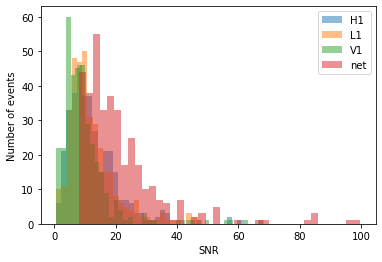

In [11]:

for key, values in data_generator_test.data['SNRs'].items():
    _ = plt.hist(values, label=key, alpha=0.5, bins=40)
_ = plt.hist((data_generator_test.data['SNRs']['H1']**2 + data_generator_test.data['SNRs']['L1']**2 + data_generator_test.data['SNRs']['V1']**2 )**0.5,
                label='net', alpha=0.5, bins=40)
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Number of events')
plt.show()

In [12]:
(data_generator_test.data['SNRs']['H1']**2 + data_generator_test.data['SNRs']['L1']**2 + data_generator_test.data['SNRs']['V1']**2 )**0.5

array([24.17479861, 20.0393495 , 22.47997388, 10.66496827, 16.97579757,
       52.3635093 , 18.9333976 , 20.14282134,  8.26526683, 10.13073129,
       35.11286301, 21.45745148, 14.6789192 , 12.94242865, 82.30993172,
       10.10187894, 16.52978318, 12.692371  , 31.88402775, 26.46358201,
       12.72597988, 27.63671929, 26.4154708 , 14.63293246, 11.67163418,
       20.37758591, 29.1378644 , 16.03996879, 38.60370833, 20.32936359,
       14.20282872, 12.53330869, 60.63990855, 27.15372459, 11.84348466,
       37.48429837, 16.44777164, 29.32916359, 14.2302367 , 11.4449857 ,
       11.08855068, 14.78632409, 10.56878389, 21.69436416, 21.33247075,
       20.28899608,  9.46545449, 13.48146965, 14.42947799, 37.33065447,
       25.83549842, 24.59624624, 17.97138312, 10.02296134, 14.74518338,
       10.95837616, 14.30332763, 20.08764327, 29.27523388, 27.63025254,
       14.88447385, 52.46329307, 17.348125  , 47.75811291, 28.0777551 ,
       22.90746845, 28.88787092, 23.84297908, 19.52543089, 23.69

# Load model

In [13]:
ipca_path = config['model_parameters']['ipca_path']
ipca_gen = load_model(ipca_path)
n_components = ipca_gen.n_components

downsample_rate = config_embd_noproj['downsample_rate']
n_freq = dataset_test[0:2][1][:,:,::downsample_rate].shape[-1]
device='cuda:0'
embedding_proj = get_model(config_embd_proj).to(device)
embedding_noproj = get_model(config_embd_noproj).to(device)
flow = get_model(config_flow).to(device)

Model loaded from ../scripts/ipca_models/IPCA_BNSFD_10000to500_ExpUnwrap_fixtc_lowspin_200Mpc.pickle


In [14]:
ckpt_dir = config['ckpt_dir']
ckpt_path = f'{ckpt_dir}/checkpoint.pickle'

In [15]:

checkpoint = torch.load(ckpt_path)
start_epoch = checkpoint['epoch']
embedding_proj.load_state_dict(checkpoint['embd_proj_state_dict'])
embedding_noproj.load_state_dict(checkpoint['embd_noproj_state_dict'])
flow.load_state_dict(checkpoint['flow_state_dict']) 

print(f'Loaded states from {ckpt_path}, epoch={start_epoch}.')

Loaded states from trained_models/glasnsf_conv1dconv2d_a1d200/checkpoint.pickle, epoch=178.


In [16]:
#sample_list, loss_list = sample_zukoflow(flow, embedding_proj, embedding_noproj, dataset_test, detector_names, ipca_gen, device=device, Nsample=5000)
sample_list, loss_list = sample_glasflow(flow, embedding_proj, embedding_noproj, dataset_test, detector_names, ipca_gen, device=device, Nsample=5000,downsample_rate=downsample_rate)


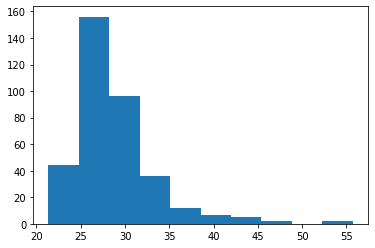

In [17]:
_ = plt.hist(loss_list)

In [24]:
len(data_generator_test.data['injection_parameters']['SNRs'])


360

In [19]:
result_list = make_results(sample_list, data_generator_test.data['injection_parameters'], PARAMETER_NAMES_CONTEXT_PRECESSINGBNS_BILBY)

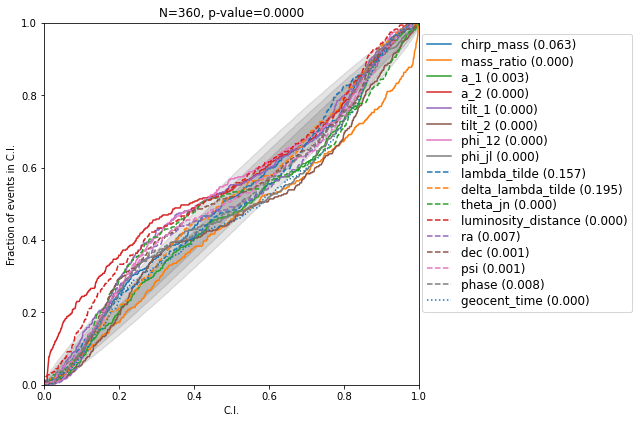

In [20]:
#fig = bilby.core.result.make_pp_plot(result_list, filename=None, save=False, confidence_interval=[0.68, 0.95, 0.997])
fig = make_pp_plot(result_list, filename = f"{config_path}/pp_plot.png", save=True, confidence_interval=[0.68, 0.95, 0.997])

In [21]:
look_index = 2
result = result_list[look_index]

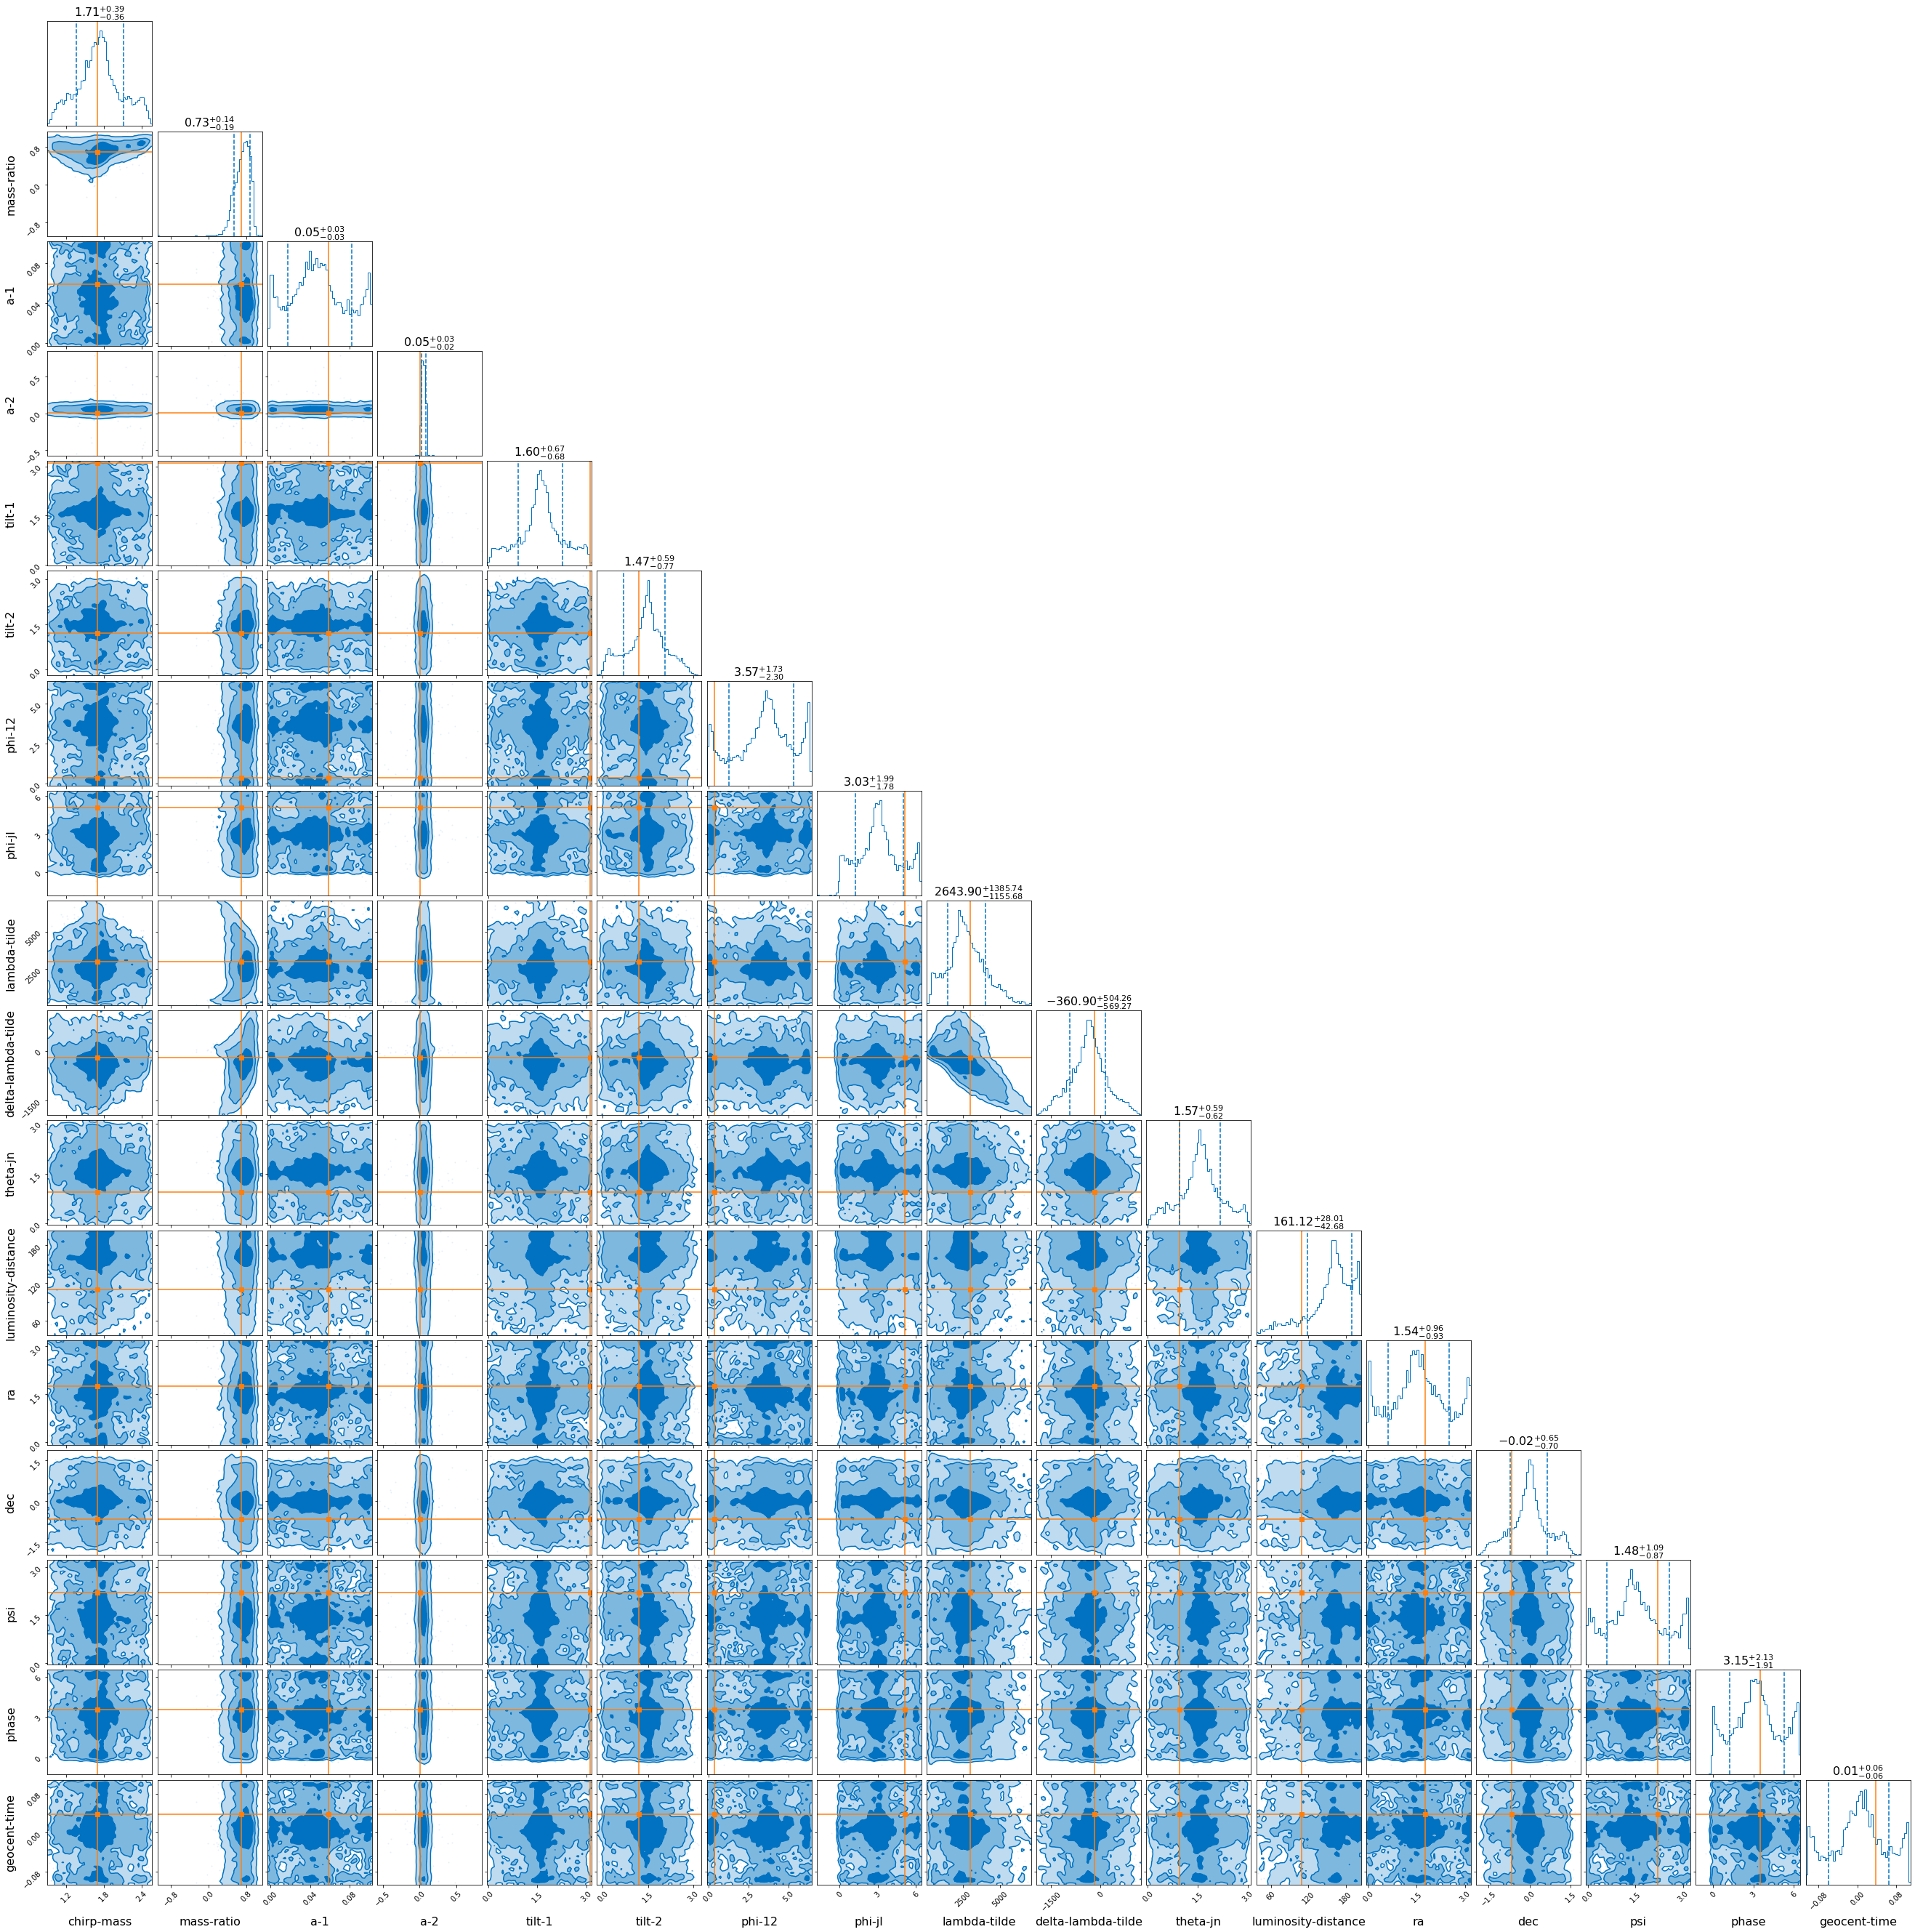

In [22]:
fig = result.plot_corner(parameters=result.injection_parameters, save=False, filename = f"{config_path}/corner{look_index}.png")